# Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('job_train.csv')
test_df = pd.read_csv('job_test.csv')
attr_d = pd.read_csv('속성_D_코드.csv')
attr_h = pd.read_csv('속성_H_코드.csv')
attr_l = pd.read_csv('속성_L_코드.csv')

In [3]:
job_df = pd.concat([train_df,test_df],axis=0)

# Pre-Processing

In [4]:
# 콘텐츠 속성코드 레프트 조인
job_df2 = pd.merge(job_df, attr_d, how='left', left_on='contents_attribute_d', right_on='속성 D 코드')
job_df2 = pd.merge(job_df2, attr_h, how='left', left_on='contents_attribute_h', right_on='속성 H 코드')
job_df2 = pd.merge(job_df2, attr_l, how='left', left_on='contents_attribute_l', right_on='속성 L 코드')

# 콘텐츠 속성으로 컬럼명 변경
job_df2 = job_df2.rename(columns={'속성 D 코드':'contents_attr_d_c',
                                  '속성 D 대분류코드':'contents_attr_d_l',
                                  '속성 D 중분류코드':'contents_attr_d_m',
                                  '속성 D 소분류코드':'contents_attr_d_s',
                                  '속성 D 세분류코드':'contents_attr_d_ss',
                                  '속성 L 코드':'contents_attr_l_c',
                                  '속성 L 대분류코드':'contents_attr_l_l',
                                  '속성 L 중분류코드':'contents_attr_l_m',
                                  '속성 L 소분류코드':'contents_attr_l_s',
                                  '속성 L 세분류코드':'contents_attr_l_ss',
                                  '속성 H 코드':'contents_attr_h_c',
                                  '속성 H 대분류코드':'contents_attr_h_l',
                                  '속성 H 중분류코드':'contents_attr_h_m'})

In [5]:
# 유저 선호1 속성코드 레프트 조인
job_df2 = pd.merge(job_df2, attr_d, how='left', left_on='person_prefer_d_1', right_on='속성 D 코드')
job_df2 = pd.merge(job_df2, attr_h, how='left', left_on='person_prefer_h_1', right_on='속성 H 코드')

# 유저 선호1 속성으로 컬럼명 변경
job_df2 = job_df2.rename(columns={'속성 D 코드':'person_prefer_d1_c',
                                  '속성 D 대분류코드':'person_prefer_d1_l',
                                  '속성 D 중분류코드':'person_prefer_d1_m',
                                  '속성 D 소분류코드':'person_prefer_d1_s',
                                  '속성 D 세분류코드':'person_prefer_d1_ss',
                                  '속성 H 코드':'person_prefer_h1_c',
                                  '속성 H 대분류코드':'person_prefer_h1_l',
                                  '속성 H 중분류코드':'person_prefer_h1_m'})

In [6]:
# 유저 선호2 속성코드 레프트 조인
job_df2 = pd.merge(job_df2, attr_d, how='left', left_on='person_prefer_d_2', right_on='속성 D 코드')
job_df2 = pd.merge(job_df2, attr_h, how='left', left_on='person_prefer_h_2', right_on='속성 H 코드')

# 유저 선호2 속성으로 컬럼명 변경
job_df2 = job_df2.rename(columns={'속성 D 코드':'person_prefer_d2_c',
                                  '속성 D 대분류코드':'person_prefer_d2_l',
                                  '속성 D 중분류코드':'person_prefer_d2_m',
                                  '속성 D 소분류코드':'person_prefer_d2_s',
                                  '속성 D 세분류코드':'person_prefer_d2_ss',
                                  '속성 H 코드':'person_prefer_h2_c',
                                  '속성 H 대분류코드':'person_prefer_h2_l',
                                  '속성 H 중분류코드':'person_prefer_h2_m'})

In [7]:
# 유저 선호3 속성코드 레프트 조인
job_df2 = pd.merge(job_df2, attr_d, how='left', left_on='person_prefer_d_3', right_on='속성 D 코드')
job_df2 = pd.merge(job_df2, attr_h, how='left', left_on='person_prefer_h_3', right_on='속성 H 코드')

# 유저 선호3 속성으로 컬럼명 변경
job_df2 = job_df2.rename(columns={'속성 D 코드':'person_prefer_d3_c',
                                  '속성 D 대분류코드':'person_prefer_d3_l',
                                  '속성 D 중분류코드':'person_prefer_d3_m',
                                  '속성 D 소분류코드':'person_prefer_d3_s',
                                  '속성 D 세분류코드':'person_prefer_d3_ss',
                                  '속성 H 코드':'person_prefer_h3_c',
                                  '속성 H 대분류코드':'person_prefer_h3_l',
                                  '속성 H 중분류코드':'person_prefer_h3_m'})

In [8]:
# 매치여부 컬럼명 변경
# c : 속성코드 / l : 대분류 / m : 중분류 / s : 소분류 / ss : 세부분류
job_df2 = job_df2.rename(columns={'d_s_match_yn':'d1_c_match_yn',
                                  'd_m_match_yn':'d1_ss_match_yn',
                                  'h_s_match_yn':'h1_c_match_yn',
                                  'd_l_match_yn':'d1_l_match_yn',
                                  'h_l_match_yn':'h1_l_match_yn',
                                  'h_m_match_yn':'h1_m_match_yn'})

In [9]:
# 매칭여부 컬럼 생성
# d1
job_df2['d1_m_match_yn'] = np.where(job_df2.person_prefer_d1_m == job_df2.contents_attr_d_m, True, False)
job_df2['d1_s_match_yn'] = np.where(job_df2.person_prefer_d1_s == job_df2.contents_attr_d_s, True, False)

#d2
job_df2['d2_c_match_yn'] = np.where(job_df2.person_prefer_d2_c == job_df2.contents_attr_d_c, True, False)
job_df2['d2_l_match_yn'] = np.where(job_df2.person_prefer_d2_l == job_df2.contents_attr_d_l, True, False)
job_df2['d2_m_match_yn'] = np.where(job_df2.person_prefer_d2_m == job_df2.contents_attr_d_m, True, False)
job_df2['d2_s_match_yn'] = np.where(job_df2.person_prefer_d2_s == job_df2.contents_attr_d_s, True, False)
job_df2['d2_ss_match_yn'] = np.where(job_df2.person_prefer_d2_ss == job_df2.contents_attr_d_ss, True, False)

#d3
job_df2['d3_c_match_yn'] = np.where(job_df2.person_prefer_d3_c == job_df2.contents_attr_d_c, True, False)
job_df2['d3_l_match_yn'] = np.where(job_df2.person_prefer_d3_l == job_df2.contents_attr_d_l, True, False)
job_df2['d3_m_match_yn'] = np.where(job_df2.person_prefer_d3_m == job_df2.contents_attr_d_m, True, False)
job_df2['d3_s_match_yn'] = np.where(job_df2.person_prefer_d3_s == job_df2.contents_attr_d_s, True, False)
job_df2['d3_ss_match_yn'] = np.where(job_df2.person_prefer_d3_ss == job_df2.contents_attr_d_ss, True, False)

#h2
job_df2['h2_c_match_yn'] = np.where(job_df2.person_prefer_h2_c == job_df2.contents_attr_h_c, True, False)
job_df2['h2_l_match_yn'] = np.where(job_df2.person_prefer_h2_l == job_df2.contents_attr_h_l, True, False)
job_df2['h2_m_match_yn'] = np.where(job_df2.person_prefer_h2_m == job_df2.contents_attr_h_m, True, False)

#h3
job_df2['h3_c_match_yn'] = np.where(job_df2.person_prefer_h3_c == job_df2.contents_attr_h_c, True, False)
job_df2['h3_l_match_yn'] = np.where(job_df2.person_prefer_h3_l == job_df2.contents_attr_h_l, True, False)
job_df2['h3_m_match_yn'] = np.where(job_df2.person_prefer_h3_m == job_df2.contents_attr_h_m, True, False)

In [10]:
# 날짜컬럼생성
job_df2['contents_open_month'] = job_df2['contents_open_dt'].str.slice(5,7)
job_df2['contents_open_day'] = job_df2['contents_open_dt'].str.slice(8,10)
job_df2['contents_open_hour'] = job_df2['contents_open_dt'].str.slice(11,13).str.replace(':','')
job_df2['contents_open_month'] = job_df2['contents_open_dt'].str.slice(5,7)
job_df2['contents_open_day'] = job_df2['contents_open_dt'].str.slice(8,10)
job_df2['contents_open_hour'] = job_df2['contents_open_dt'].str.slice(11,13).str.replace(':','')

In [11]:
# 속성E 매칭여부
job_df2['e_match_yn'] = np.where(job_df2.person_prefer_e == job_df2.contents_attribute_e, True, False)

# 속성E 코드값 차이
job_df2['e_diff_abs'] = np.abs(job_df2['person_prefer_e']-job_df2['contents_attribute_e'])

In [12]:
for i in ['d1_c_match_yn','d1_l_match_yn','d1_m_match_yn','d1_s_match_yn','d1_ss_match_yn',
           'd2_c_match_yn','d2_l_match_yn','d2_m_match_yn','d2_s_match_yn','d2_ss_match_yn',
           'd3_c_match_yn','d3_l_match_yn','d3_m_match_yn','d3_s_match_yn','d3_ss_match_yn',
           'h1_c_match_yn','h1_l_match_yn','h1_m_match_yn',
           'h2_c_match_yn','h2_l_match_yn','h2_m_match_yn',
           'h3_c_match_yn','h3_l_match_yn','h3_m_match_yn',
           'e_match_yn'
         ]:
    job_df2[i] = job_df2[i].astype('int')

In [13]:
job_df2['contents_open_month'] = job_df2['contents_open_month'].astype('int')
job_df2['contents_open_day'] = job_df2['contents_open_day'].astype('int')
job_df2['contents_open_hour'] = job_df2['contents_open_hour'].astype('int')

In [14]:
job_df2.drop(['id','person_prefer_f','person_prefer_g','contents_open_dt','contents_rn','person_rn'],axis='columns',inplace=True)

In [15]:
for i in list(set(job_df2.columns)-set(['target'])):
    if job_df2[i].isna().sum() != 0:
        job_df2[i] = job_df2[i].fillna(job_df2.describe()[i].mean())

In [16]:
train_df2 = job_df2.loc[job_df2.target.notnull(),:]
test_df2 = job_df2.loc[job_df2.target.isnull(),:]

In [17]:
test_df2 = test_df2.drop(['target'], axis='columns')

In [18]:
train_df2.shape

(501951, 89)

In [19]:
test_df2.shape

(46404, 88)

In [20]:
from sklearn.model_selection import train_test_split
 
x = train_df2.drop(['target'],axis='columns')
y = train_df2['target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## CatBoost

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [ ]:
model=CatBoostClassifier().fit(x_train, y_train)

In [24]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.6423694567600954

#### Dimention Reduction : Permutation Importance

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

In [27]:
perm = PermutationImportance(model, random_state=3).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top=100)

Weight,Feature
0.0241 ± 0.0019,contents_attr_d_ss
0.0139 ± 0.0016,contents_attribute_d
0.0070 ± 0.0017,contents_attr_d_s
0.0063 ± 0.0007,contents_attribute_j_1
0.0058 ± 0.0011,contents_attr_d_c
0.0056 ± 0.0008,person_prefer_e
0.0056 ± 0.0010,h1_l_match_yn
0.0053 ± 0.0007,contents_attribute_e
0.0049 ± 0.0005,contents_attribute_a
0.0041 ± 0.0014,contents_attribute_h


In [28]:
job_df3 = job_df2[['contents_attribute_j_1','contents_attribute_h','h1_l_match_yn','contents_attribute_d','person_prefer_e','person_prefer_d1_ss','d2_m_match_yn','person_prefer_h3_m',
                   'd1_m_match_yn','person_prefer_d_1','contents_attribute_a','contents_attr_d_s','h1_m_match_yn','contents_attribute_e','contents_attr_d_m','person_prefer_d2_c',
                   'h2_l_match_yn','person_prefer_h_1','person_attribute_a_1','person_prefer_d_3','h1_c_match_yn','contents_attribute_l','d2_l_match_yn','person_prefer_h2_l',
                   'contents_open_hour','e_diff_abs','contents_attr_d_ss','contents_attribute_c','person_prefer_d_2','person_attribute_b','contents_attr_h_c','person_prefer_h1_l',
                   'person_prefer_d3_ss','h3_l_match_yn','contents_attr_l_ss','person_prefer_h_2','d1_l_match_yn','person_prefer_h_3','person_prefer_h1_m','contents_attr_h_l',
                   'person_prefer_c','contents_attribute_m','person_prefer_d2_ss','contents_attr_d_c','contents_attr_l_m','person_prefer_d1_c','person_prefer_d1_m','contents_attr_d_l',
                   'contents_attribute_i','h2_m_match_yn','person_prefer_d2_s','contents_attr_l_l','d2_s_match_yn','target']]

In [29]:
cat_features = job_df3.columns[job_df3.nunique() > 2].tolist()

In [30]:
train_df3 = job_df3.loc[job_df2.target.notnull(),:]
test_df3 = job_df3.loc[job_df2.target.isnull(),:]

In [31]:
test_df3 = test_df3.drop(['target'], axis='columns')

In [32]:
train_df3.shape

(501951, 54)

In [33]:
test_df3.shape

(46404, 53)

In [34]:
x_train = train_df3.drop(['target'],axis='columns')
y_train = train_df3['target']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

#### Hyper Parameter Tuning

In [35]:
import optuna

In [36]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(x_train,y_train, test_size=0.3)
    
    # define parameters
    params = {
       'iterations':trial.suggest_int("iterations", 500, 3000),
        'objective':trial.suggest_categorical('objective',['CrossEntropy','Logloss']),
        'bootstrap_type':trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'od_wait':trial.suggest_int('od_wait', 500, 1000),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01,1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'random_strength': trial.suggest_uniform('random_strength',20,50),
        'depth': trial.suggest_int('depth',1,15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,20),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,30),
        'verbose': False,
        "eval_metric":'F1',
        "cat_features" : cat_features,
        "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,10,1),
        'task_type' : 'GPU',
    }
    
    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    elif params['bootstrap_type'] == 'Bernoulli':
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1)
    
    # model fit
    model = CatBoostClassifier(**params)
    model.fit(
        train_x, train_y, eval_set=[(valid_x, valid_y)],
        use_best_model=True
    )
    
    # validation prediction
    preds = model.predict(valid_x)
    pred_labels = np.rint(preds)
    score = f1_score(valid_y, pred_labels)
    return score

In [ ]:
study = optuna.create_study(
    direction='maximize',
    study_name='CatBoo'
)
study.optimize(
    objective, 
    n_trials=20
)

In [38]:
Best_params = study.best_trial.params
print(f"Best Trial: {study.best_trial.value}")
print(f"Best Params: {study.best_trial.params}")

Best Trial: 0.6722163753333386
Best Params: {'iterations': 506, 'objective': 'Logloss', 'bootstrap_type': 'Bernoulli', 'od_wait': 846, 'learning_rate': 0.1515453951337148, 'reg_lambda': 97.79411351050788, 'random_strength': 40.44043236082651, 'depth': 6, 'min_data_in_leaf': 20, 'leaf_estimation_iterations': 22, 'one_hot_max_size': 6, 'subsample': 0.5484694919459232}


In [50]:
best_params ={'iterations': 506,
              'objective': 'Logloss',
              'bootstrap_type': 'Bernoulli',
              'od_wait': 846, 
              'learning_rate': 0.1515453951337148,
              'reg_lambda': 97.79411351050788, 
              'random_strength': 40.44043236082651, 
              'depth': 6, 
              'min_data_in_leaf': 20,
              'leaf_estimation_iterations': 22,
              'one_hot_max_size': 6, 
              'subsample': 0.5484694919459232,
              "cat_features": cat_features,
              "eval_metric":'F1',
              'task_type' : 'GPU'}

In [40]:
from sklearn.model_selection import StratifiedKFold , KFold

In [41]:
is_holdout = False
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=43)

In [46]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True) 

In [48]:
model.get_best_score()

{'learn': {'Logloss': 0.6315262199469074},
 'validation': {'Logloss': 0.6426427669642693}}

In [ ]:
scores = []
models = []

for tri, vai in cv.split(x_train):
    preds = []
    model = CatBoostClassifier(**best_params)
    model.fit(x_train.iloc[tri], y_train[tri],
            eval_set=[(x_train.iloc[vai], y_train[vai])],
        )
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

In [52]:
print(scores)
print(np.mean(scores))

[0.6703172929447853, 0.6727824379796538, 0.6713447216477592, 0.6735916240243355, 0.6684978791156702]
0.6713067911424406


#### 만든 모델의 변수 중요도 파악

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names' : feature_names, 'feature_importance' : feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

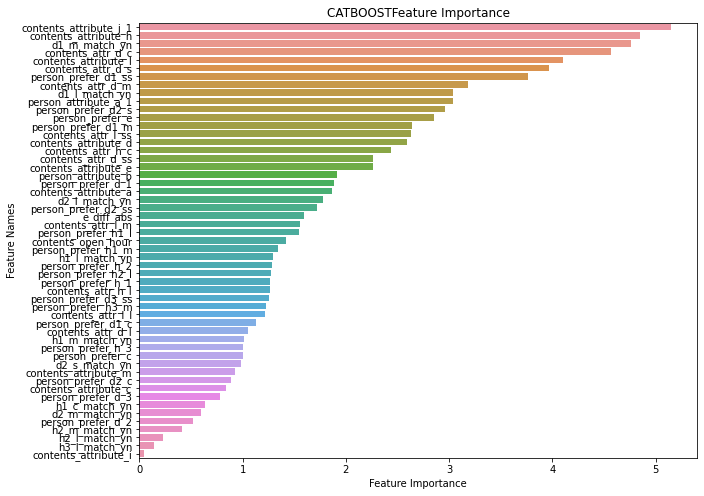

In [55]:
plot_feature_importance(model.get_feature_importance(), x_test.columns, 'CATBOOST')

#### 임계값 조정 : K-fold한 값의 평균을 구하다 보니 예측값의 극단값이 작아짐

In [56]:
threshold = np.arange(0.3, 0.5, 0.01)
for threshold in threshold :
    pred_list = []
    scores = []
    for i,(tri, vai) in enumerate( cv.split(x_train) ):
        pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
        pred = np.where(pred >= threshold , 1, 0)
        score = f1_score(y_train[vai],pred)
        scores.append(score)
        pred = models[i].predict_proba(test_df3)[:, 1]
        pred_list.append(pred)
    print(threshold)
    print(scores)
    print(np.mean(scores))
    print('\n')

0.3
[0.6997265402756621, 0.7016531431774532, 0.7009374942667915, 0.6996255090168704, 0.704106618815305]
0.7012098611104165


0.31
[0.7013834942477711, 0.7030791313608372, 0.7020417217380052, 0.701027528985109, 0.7050918377925002]
0.7025247428248445


0.32
[0.7025157115416892, 0.7039681872917192, 0.7032784746426108, 0.7023810622065185, 0.7057302313199403]
0.7035747334004956


0.33
[0.7034769442014878, 0.7047495340825661, 0.7044773314540757, 0.7032341478387856, 0.7062909554922334]
0.7044457826138297


0.34
[0.704297297810524, 0.7052512651077122, 0.7051730512186104, 0.7041220285558828, 0.7063997984925694]
0.7050486882370597


0.35000000000000003
[0.7053871085284696, 0.7062340698721757, 0.7063372799754971, 0.7052351509757322, 0.7067033364979006]
0.7059793891699551


0.36000000000000004
[0.7056236376846694, 0.7071903393422161, 0.7065331979302674, 0.705494442479906, 0.7069734331280094]
0.7063630101130137


0.37000000000000005
[0.7055460374957169, 0.7070582597384815, 0.7066748794962797, 0.705

In [57]:
threshold = np.arange(0.35, 0.37, 0.001)
for threshold in threshold :
    pred_list = []
    scores = []
    for i,(tri, vai) in enumerate( cv.split(x_train) ):
        pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
        pred = np.where(pred >= threshold , 1, 0)
        score = f1_score(y_train[vai],pred)
        scores.append(score)
        pred = models[i].predict_proba(test_df3)[:, 1]
        pred_list.append(pred)
    print(threshold)
    print(scores)
    print(np.mean(scores))
    print('\n')

0.35
[0.7053871085284696, 0.7062340698721757, 0.7063372799754971, 0.7052351509757322, 0.7067033364979006]
0.7059793891699551


0.351
[0.7053775414210839, 0.7064781599493564, 0.7063107261263679, 0.705216666034803, 0.7065980896399706]
0.7059962366343163


0.352
[0.7055839514238499, 0.7065949889603532, 0.706305511327668, 0.7053064012675402, 0.7066911180629787]
0.706096394208478


0.353
[0.7055813640342018, 0.7066352760294047, 0.7063601797442103, 0.705235467849308, 0.7067496466153604]
0.7061123868544972


0.354
[0.705604867435547, 0.7067243867243868, 0.7063583592818975, 0.7052215400406774, 0.7069355187390681]
0.7061689344443154


0.355
[0.7055637474581008, 0.706738824798259, 0.7065297915123293, 0.7051983519045399, 0.7068346562017447]
0.7061730743749948


0.356
[0.7056485456562636, 0.7067814087058756, 0.7064907550077042, 0.7053086725461438, 0.7068946845064044]
0.7062248132844783


0.357
[0.705602873862912, 0.7068516410365254, 0.7064833914904282, 0.7051377371079974, 0.7068435368786219]
0.706

In [58]:
pred = np.mean(pred_list , axis = 0 )
pred = np.where(pred >= 0.362 , 1, 0)

In [59]:
# submission 저장
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = pred
sample_submission
sample_submission.to_csv('submission_f.csv', index=False)